# 方差偏差分解
先引入一个问题: Machine Learning 与 Curve Fitting 的区别是什么?1

Curve Fitting 是使用所有的数据拟合一条曲线; 而 Machine Learning 是采用真实世界中采样的一小部分数据,并且我们希望我们的模型能够对于未知数据有不错的泛化性能.因此涉及到Bias-Variance的权衡.

学习算法的预测误差, 或者说泛化误差(generalization error)可以分解为三个部分: 偏差(bias), 方差(variance) 和噪声(noise). 在估计学习算法性能的过程中, 我们主要关注偏差与方差. 因为噪声属于不可约减的误差 (irreducible error).

下面来用公式推导泛化误差与偏差与方差, 噪声之间的关系.

| 数学符号|  涵义 | 
|  :--- |  :---- |
|$x$ | 测试样本 |
|$D $ |数据集 |
|$y_D$ |$x$ 在数据集中的标记| 
|$y $ |$x$ 的真实标记 |
|$f $ |训练集 $D$ 学得的模型 |
|$f(x;D) $ | 由训练集 $D$ 学得的模型 $\hat{f}(x)$ 对 $x$ 的预测输出 |
|$\hat{f}(x)$ |  模型$\hat{f}(x)$ 对 $x$ 的 **期望预测**输出|

## 泛化误差
以回归任务为例, 学习算法的平方预测误差期望为:
$$ Err(x) = E[(y-f(x;D))^2]$$

### 方差
在一个训练集 $D$ 上模型 $f$ 对测试样本 $x$ 的预测输出为 $f(x;D)$, 那么学习算法 $f$ 对测试样本 $x$ 的**期望预测**为:
$$ \hat{f}(x) = E_D[f(x;D)]$$
上面的期望预测也就是针对**不同**数据集 $D$, $f$ 对 $x$ 的预测值取其期望, 也被叫做 average predicted.

使用样本数相同的不同训练集产生的方差为:
$$ var(x) = E_D[(f(x;D))] $$

### 噪声
噪声为真实标记与数据集中的实际标记间的偏差:$\varepsilon^2 = E_D[(y_D-y)^2]$
### 偏差
期望预测与真实标记的误差称为偏差(bias), 为了方便起见, 我们直接取偏差的平方:
$$bias^2(x) = (\hat{f}(x)-y)^2$$

对算法的期望繁华误差进行分解:
![方差偏差分解.png](../images/方差偏差分解.png)
上面的公式的蓝色部分是对上面对应的等价替换, 然后对其展开后, 红色部分刚好为 0.

对最终的推导结果稍作整理:
![误差与噪音.png](../images/误差与噪音.png)

至此, 继续来看一下偏差, 方差与噪声的含义 :

偏差、方差、噪声

 - 偏差：度量了模型的期望预测和真实结果的偏离程度，刻画了**模型本身的拟合能力**。
 - 方差：度量了同样大小的训练集的变动所导致的学习性能的变化，即刻画了**数据扰动所造成的影响**。
 - 噪声：表达了当前任务上任何模型所能达到的期望泛化误差的下界，刻画了**学习问题本身的难度**。

## 偏差-方差窘境(bias-variance dilemma)

为了得到泛化性能好的模型，我们需要使偏差较小，即能充分拟合数据，并且使方差小，使数据扰动产生的影响小。但是偏差和方差在一定程度上是有冲突的，这称作为**偏差-方差窘境**。

下图给出了在模型训练不足时，拟合能力不够强，训练数据的扰动不足以使学习器产生显著变化，此时偏差主导泛化误差，此时称为欠拟合现象。当随着训练程度加深，模型的拟合能力增强，训练数据的扰动慢慢使得方差主导泛化误差。当训练充足时，模型的拟合能力非常强，数据轻微变化都能导致模型发生变化，如果过分学习训练数据的特点，则会发生**过拟合**。

 - 针对欠拟合，我们提出集成学习的概念并且对于模型可以控制训练程度，比如神经网络加多隐层，或者决策树增加树深。
增加模型的迭代次数；更换描述能力更强的模型；生成更多特征供训练使用；降低正则化水平。

 - 针对过拟合，我们需要降低模型的复杂度，提出了正则化惩罚项。
扩增训练集；减少训练使用的特征的数量；提高正则化水平。

随着模型复杂度的提升, 偏差逐渐减小, 方差逐渐增大. 最佳的模型复杂度是在 Total Error 最小的时候, 该点导数为0. 由于 Err=variance+bias+noise, 所以在拐点处：

$$ \frac{dBias}{dComplexity} = - \frac{dVariance}{cComplexity} $$

给出了寻找最优平衡点的数学描述。若模型复杂度大于平衡点，则模型的方差会偏高，模型倾向于过拟合；若模型复杂度小于平衡点，则模型的偏差会偏高，模型倾向于过拟合。

![bias-variance-tradeoff](../images/bias-variance-tradeoff.png)

## Bias-Variance Tradeoff 理论意义

偏差方差分解并不是对于所有的机器学习模型都有严格的数学证明，但是他们的基本关系是基本一致的，因此通过探究泛化误差分解我们可以更好地去思考机器学习模型更本质的一些问题。

 - 能够让我们更好地认识模型的复杂度, 指导我们对模型的改进方向.
 - 偏差-方差分解实用价值很有限. 偏差和方差并不能够真正的被计算,因为我们不知道数据的真实分布. 偏置-方差分解依赖于对所有的数据集求平均,而在实际应用中我们只有一个观测数据集
 
## K折交叉验证与Bias-Variance关系

为什么K-fold Cross Validation中的k值会影响偏差和方差呢？

K折交叉验证重复k次地把数据集分成训练集和测试集，$K$值越大，每次划分的训练集就越大，估计模型的期望$E[\hat{f}]$就越接近整个数据集的真实模型$\hat{f}$,因此模型偏差就越小。

## 偏差-方差窘境实例

在机器学习中就有很多算法是通过降低方差提高偏差来获得更好地模型的，一个比较经典的例子就是集成算法中的bagging算法：bagging 方法会在原始训练集的随机子集上构建一类黑盒估计器的多个实例，然后把这些估计器的预测结果结合起来形成最终的预测结果。 该方法通过在构建模型的过程中引入随机性，来减少基估计器的方差(例如，决策树)。

在众多的的bagging算法中，最经典的例子莫过于随机森林，其通过样本子采样与特征子采样来增加随机性，以此降低方差（同时增加偏差），来得到拥有更低泛化误差的机器学习模型。而极限随机森林则更近一步，对于每个决策树的阈值也会进行随机选择从而进一步降低方差（同时增加偏差）。

**下面就是一个决策树-随机森林-极限随机森林的例子：**

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
RandomForestRegressor: 0.0193 (error) = 0.0004 (bias^2)  + 0.0090 (var) + 0.0098 (noise)
ExtraTreesClassifier: 0.0166 (error) = 0.0009 (bias^2)  + 0.0057 (var) + 0.0098 (noise)


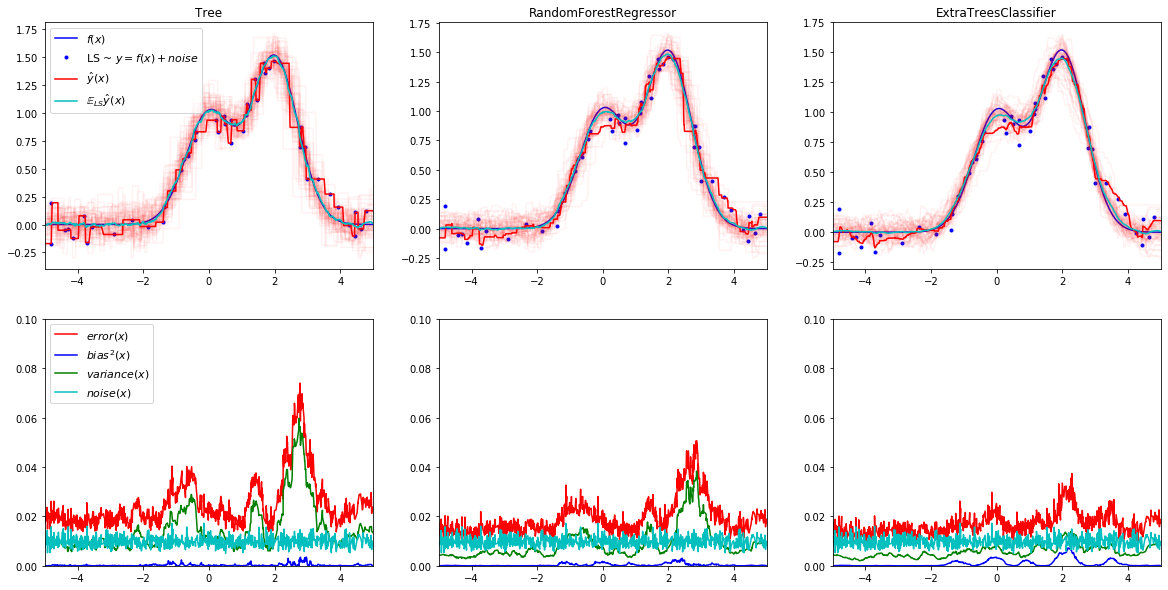

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 10))

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50  # Number of iterations for computing expectations
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise
np.random.seed(0)

estimators = [("Tree", DecisionTreeRegressor()),
              ("RandomForestRegressor", RandomForestRegressor(n_estimators=20,random_state=100,bootstrap = True)),
              ("ExtraTreesClassifier", ExtraTreesRegressor(n_estimators=20,random_state=100,bootstrap = True)), ]

n_estimators = len(estimators)


# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))
        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))
    return X, y

X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label="$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label="$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == 0:
        plt.legend(loc="upper left", prop={"size": 11})

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == 0:
        plt.legend(loc="upper left", prop={"size": 11})

plt.show()

## 参考资料

 - [集成算法中的Bagging](https://blog.csdn.net/FontThrone/article/details/79074296)
 - [RandomForest:随机森林](https://blog.csdn.net/FontThrone/article/details/79074154)
 - [偏差方差分解](https://www.cnblogs.com/makefile/p/bias-var.html)
 - [http://www.learnopencv.com/bias-variance-tradeoff-in-machine-learning/](https://www.learnopencv.com/bias-variance-tradeoff-in-machine-learning/)
 - [偏差与方差](http://liuchengxu.org/blog-cn/posts/bias-variance/)
 - [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)
 - [机器学习中的Bias(偏差)，Error(误差)，和Variance(方差)有什么区别和联系？](https://www.zhihu.com/question/27068705)
 - 周志华, 《机器学习》，2.5 节偏差与方差